## Processamento das coletas

### Agrega as leituras das coletas de uma aplicação

**Considerações:**

- Para **Memória** a regra utilizada é obter o valor máximo de memória, visto que a falta de memória implica na destruição do POD e sinalização do erro OOMKilled.
- Para **CPU** será considerada a mediana a fim de atenuar valores de pico. Menos CPU implica em execução mais lenta mas não causa a interrupção da aplicação.

In [2]:
import pandas as pd
import hashlib
import glob
import math
from matplotlib import pyplot as plt #para plotar os gráficos

### Agregação dos consumo de CPU

In [17]:
## Agregação dos valores de CPU
path_processados_cpu = './dados/metrics/cpu/processados'
csv_file_consolidado_cpu = f'{path_processados_cpu}/consolidado_cpu.csv'
df_consolidado_cpu = pd.read_csv(csv_file_consolidado_cpu, sep=',',decimal='.')
df_consolidado_cpu = df_consolidado_cpu.rename(columns = {'6':'hash', '5':'hora', '4':'consumo_cpu'})
df_consolidado_cpu

,hash,hora,consumo_cpu
0,ce4468ee8389709c20b40ed1c09a36c1,1,0.000956
1,0dcf61756612a9edfc06d254802e4b28,1,0.001107
2,d1ba4017a8bc09b01bae73e48dba56ea,1,0.000995
3,19d9963e0460ed384a60ef724eb79ba0,1,0.000964
4,1e300feefc2f05d7e69bbae4dd0a7bda,1,0.001019
...,...,...,...
243777,d17ad87eb3f09d8d50ace42558838b09,11,0.000025
243778,d7eb36ec208f3ce4320866a5a1b98913,11,0.000434
243779,0da32886ef25a6f5d6c81d4562215fbd,11,0.000344
243780,7b4176d7c0eb25ec1f031eef91e46e7d,11,0.000429


In [19]:
# Remove coletas zeradas
df_consolidado_cpu = df_consolidado_cpu[df_consolidado_cpu['consumo_cpu'] > 0]
df_consolidado_cpu

,hash,hora,consumo_cpu
0,ce4468ee8389709c20b40ed1c09a36c1,1,0.000956
1,0dcf61756612a9edfc06d254802e4b28,1,0.001107
2,d1ba4017a8bc09b01bae73e48dba56ea,1,0.000995
3,19d9963e0460ed384a60ef724eb79ba0,1,0.000964
4,1e300feefc2f05d7e69bbae4dd0a7bda,1,0.001019
...,...,...,...
243777,d17ad87eb3f09d8d50ace42558838b09,11,0.000025
243778,d7eb36ec208f3ce4320866a5a1b98913,11,0.000434
243779,0da32886ef25a6f5d6c81d4562215fbd,11,0.000344
243780,7b4176d7c0eb25ec1f031eef91e46e7d,11,0.000429


In [20]:
# Transforma em miliCPU (x 1000)
df_consolidado_cpu['consumo_cpu'] = df_consolidado_cpu['consumo_cpu'] * 1000
df_consolidado_cpu

,hash,hora,consumo_cpu
0,ce4468ee8389709c20b40ed1c09a36c1,1,0.955533
1,0dcf61756612a9edfc06d254802e4b28,1,1.106964
2,d1ba4017a8bc09b01bae73e48dba56ea,1,0.994724
3,19d9963e0460ed384a60ef724eb79ba0,1,0.964463
4,1e300feefc2f05d7e69bbae4dd0a7bda,1,1.018835
...,...,...,...
243777,d17ad87eb3f09d8d50ace42558838b09,11,0.025104
243778,d7eb36ec208f3ce4320866a5a1b98913,11,0.434370
243779,0da32886ef25a6f5d6c81d4562215fbd,11,0.344358
243780,7b4176d7c0eb25ec1f031eef91e46e7d,11,0.429213


In [21]:
# Exclui coluna de hora
del df_consolidado_cpu['hora']
df_consolidado_cpu

,hash,consumo_cpu
0,ce4468ee8389709c20b40ed1c09a36c1,0.955533
1,0dcf61756612a9edfc06d254802e4b28,1.106964
2,d1ba4017a8bc09b01bae73e48dba56ea,0.994724
3,19d9963e0460ed384a60ef724eb79ba0,0.964463
4,1e300feefc2f05d7e69bbae4dd0a7bda,1.018835
...,...,...
243777,d17ad87eb3f09d8d50ace42558838b09,0.025104
243778,d7eb36ec208f3ce4320866a5a1b98913,0.434370
243779,0da32886ef25a6f5d6c81d4562215fbd,0.344358
243780,7b4176d7c0eb25ec1f031eef91e46e7d,0.429213


In [22]:
# Estatística do dado
df_consolidado_cpu.describe()

,consumo_cpu
count,212394.000000
mean,68.576141
std,599.346856
min,0.000013
25%,0.814414
50%,1.676832
75%,6.677979
max,15268.367293


In [23]:
# Agrupa pelo hash e agrega pela valor máximo (pico) de consumo de CPU
df_group_by_max_cpu = df_consolidado_cpu.groupby(['hash']).max()
# Reseta o índice
df_group_by_max_cpu.reset_index(inplace=True)
df_group_by_max_cpu = df_group_by_max_cpu.rename(columns = {'consumo_cpu':'pico_cpu'})
df_group_by_max_cpu

,hash,pico_cpu
0,0000c672f5e96d5c7078db295c99dd1f,8.738411
1,00115d136a63167e961d60147809aff7,315.642122
2,001b37c1ee0862b0326ee3571c4f05de,0.084502
3,0028c4dfdf4f19f3914cc5ca96f7b3d4,1.106187
4,002b850fcc1b96f2b1b0621d6b5ee97b,1.719575
...,...,...
10618,ffdd3f9ace04c87c5360e682942cbe80,15.462593
10619,ffdf76b5e9458fb21062d50557d7f8fa,0.126827
10620,ffe759fe7996f523feb279a03a48233a,0.009233
10621,ffee4328dfcdb0cc27e380c4339553e6,528.148654


<AxesSubplot:>

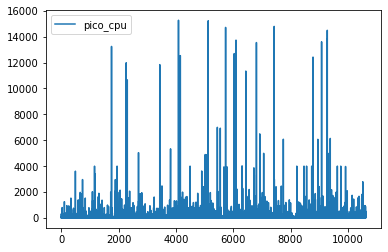

In [24]:
df_group_by_max_cpu.plot()

In [25]:
# Agrupa pelo hash e agrega pela mediana dos valores de consumo de CPU
df_group_by_med_cpu = df_consolidado_cpu.groupby(['hash']).median()
# Reseta o índice
df_group_by_med_cpu.reset_index(inplace=True)
df_group_by_med_cpu = df_group_by_med_cpu.rename(columns = {'consumo_cpu':'mediana_cpu'})
df_group_by_med_cpu

,hash,mediana_cpu
0,0000c672f5e96d5c7078db295c99dd1f,6.028352
1,00115d136a63167e961d60147809aff7,184.985555
2,001b37c1ee0862b0326ee3571c4f05de,0.079422
3,0028c4dfdf4f19f3914cc5ca96f7b3d4,0.948848
4,002b850fcc1b96f2b1b0621d6b5ee97b,1.719575
...,...,...
10618,ffdd3f9ace04c87c5360e682942cbe80,3.362830
10619,ffdf76b5e9458fb21062d50557d7f8fa,0.126827
10620,ffe759fe7996f523feb279a03a48233a,0.007061
10621,ffee4328dfcdb0cc27e380c4339553e6,66.968071


In [30]:
# Salva em Arquivo
# df_group_by_cpu.to_csv(f'{path_processados}/group_by_cpu.csv', index=False)

<AxesSubplot:>

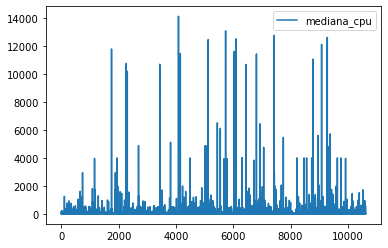

In [26]:
df_group_by_med_cpu.plot()

### Agregação de Memória

In [27]:
## Agregação dos dados de Memória
path_processados_memoria = './dados/metrics/memoria/processados'
csv_file_consolidado_memoria = f'{path_processados_memoria}/consolidado_memoria.csv'
df_consolidado_memoria = pd.read_csv(csv_file_consolidado_memoria, sep=',',decimal='.')
df_consolidado_memoria = df_consolidado_memoria.rename(columns = {'6':'hash', '5':'hora', '4':'consumo_memoria'})
df_consolidado_memoria

,hash,hora,consumo_memoria
0,ce4468ee8389709c20b40ed1c09a36c1,9,1995317248
1,0dcf61756612a9edfc06d254802e4b28,9,2037846016
2,d1ba4017a8bc09b01bae73e48dba56ea,9,831680512
3,19d9963e0460ed384a60ef724eb79ba0,9,2014523392
4,1e300feefc2f05d7e69bbae4dd0a7bda,9,2039582720
...,...,...,...
244949,d17ad87eb3f09d8d50ace42558838b09,1,1912832
244950,d7eb36ec208f3ce4320866a5a1b98913,1,1978368
244951,0da32886ef25a6f5d6c81d4562215fbd,1,1871872
244952,7b4176d7c0eb25ec1f031eef91e46e7d,1,2015232


In [28]:
# Remove valores de coletas zeradas
df_consolidado_memoria = df_consolidado_memoria[df_consolidado_memoria['consumo_memoria'] > 0]
df_consolidado_memoria

,hash,hora,consumo_memoria
0,ce4468ee8389709c20b40ed1c09a36c1,9,1995317248
1,0dcf61756612a9edfc06d254802e4b28,9,2037846016
2,d1ba4017a8bc09b01bae73e48dba56ea,9,831680512
3,19d9963e0460ed384a60ef724eb79ba0,9,2014523392
4,1e300feefc2f05d7e69bbae4dd0a7bda,9,2039582720
...,...,...,...
244949,d17ad87eb3f09d8d50ace42558838b09,1,1912832
244950,d7eb36ec208f3ce4320866a5a1b98913,1,1978368
244951,0da32886ef25a6f5d6c81d4562215fbd,1,1871872
244952,7b4176d7c0eb25ec1f031eef91e46e7d,1,2015232


In [29]:
# Exclui a coluna de hora
del df_consolidado_memoria['hora']
df_consolidado_memoria

,hash,consumo_memoria
0,ce4468ee8389709c20b40ed1c09a36c1,1995317248
1,0dcf61756612a9edfc06d254802e4b28,2037846016
2,d1ba4017a8bc09b01bae73e48dba56ea,831680512
3,19d9963e0460ed384a60ef724eb79ba0,2014523392
4,1e300feefc2f05d7e69bbae4dd0a7bda,2039582720
...,...,...
244949,d17ad87eb3f09d8d50ace42558838b09,1912832
244950,d7eb36ec208f3ce4320866a5a1b98913,1978368
244951,0da32886ef25a6f5d6c81d4562215fbd,1871872
244952,7b4176d7c0eb25ec1f031eef91e46e7d,2015232


In [30]:
## Estatística do dado
df_consolidado_memoria.describe()

,consumo_memoria
count,2.449540e+05
mean,4.630007e+08
std,7.435342e+08
min,1.925120e+05
25%,4.503962e+07
50%,2.522767e+08
75%,6.023414e+08
max,2.508991e+10


In [31]:
# Pico de Memória
df_group_by_max_memoria = df_consolidado_memoria.groupby(['hash']).max()
# Reseta o índice
df_group_by_max_memoria.reset_index(inplace=True)
df_group_by_max_memoria = df_group_by_max_memoria.rename(columns = {'consumo_memoria':'pico_memoria'})
# Transforma de bytes para MB (/ (1024 * 1024)
df_group_by_max_memoria['pico_memoria'] = df_group_by_max_memoria['pico_memoria'] / (1024 * 1024)
df_group_by_max_memoria

,hash,pico_memoria
0,0000c672f5e96d5c7078db295c99dd1f,465.085938
1,00115d136a63167e961d60147809aff7,204.296875
2,001b37c1ee0862b0326ee3571c4f05de,55.792969
3,0028c4dfdf4f19f3914cc5ca96f7b3d4,636.355469
4,002b850fcc1b96f2b1b0621d6b5ee97b,1031.480469
...,...,...
12502,ffdd3f9ace04c87c5360e682942cbe80,1694.851562
12503,ffdf76b5e9458fb21062d50557d7f8fa,47.679688
12504,ffe759fe7996f523feb279a03a48233a,4.664062
12505,ffee4328dfcdb0cc27e380c4339553e6,2002.929688


<AxesSubplot:ylabel='memoria (Mb)'>

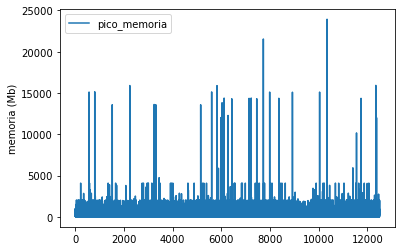

In [32]:
df_group_by_max_memoria.plot(ylabel='memoria (Mb)')

In [33]:
# Mediana de Consumo de Memória
df_group_by_med_memoria = df_consolidado_memoria.groupby(['hash']).median()
# Reseta o índice
df_group_by_med_memoria.reset_index(inplace=True)
df_group_by_med_memoria = df_group_by_med_memoria.rename(columns = {'consumo_memoria':'mediana_memoria'})
# Transforma de bytes para MB (/ (1024 * 1024)
df_group_by_med_memoria['mediana_memoria'] = df_group_by_med_memoria['mediana_memoria'] / (1024 * 1024)
df_group_by_med_memoria

,hash,mediana_memoria
0,0000c672f5e96d5c7078db295c99dd1f,463.753906
1,00115d136a63167e961d60147809aff7,204.269531
2,001b37c1ee0862b0326ee3571c4f05de,54.570312
3,0028c4dfdf4f19f3914cc5ca96f7b3d4,636.351562
4,002b850fcc1b96f2b1b0621d6b5ee97b,1031.480469
...,...,...
12502,ffdd3f9ace04c87c5360e682942cbe80,1678.222656
12503,ffdf76b5e9458fb21062d50557d7f8fa,47.679688
12504,ffe759fe7996f523feb279a03a48233a,4.656250
12505,ffee4328dfcdb0cc27e380c4339553e6,1995.833984


<AxesSubplot:ylabel='memoria (Mb)'>

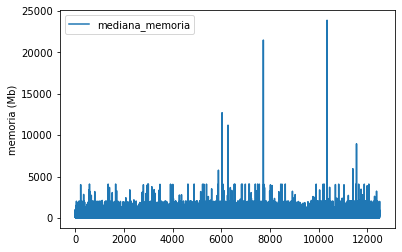

In [34]:
df_group_by_med_memoria.plot(ylabel='memoria (Mb)')

### Agregação dos valores de consumo de CPU e Memória

In [92]:
# Realizando o join do consumo de memória e cpu
# Agregação das colunas de valores mediana e pico da CPU
df_group_by_cpu = pd.concat([df_group_by_med_cpu.set_index('hash'),df_group_by_max_cpu.set_index('hash')], axis=1, join='inner').reset_index()

# Agregação das colunas de valores mediana e pico da Memoria
df_group_by_memoria = pd.concat([df_group_by_med_memoria.set_index('hash'),df_group_by_max_memoria.set_index('hash')], axis=1, join='inner').reset_index()

# Agregação das colunas de CPU e Memoria
df_group_by_cpu_memoria = pd.concat([df_group_by_cpu.set_index('hash'),df_group_by_memoria.set_index('hash')], axis=1, join='inner').reset_index()
df_group_by_cpu_memoria

,hash,mediana_cpu,pico_cpu,mediana_memoria,pico_memoria
0,0000c672f5e96d5c7078db295c99dd1f,6.028352,8.738411,463.753906,465.085938
1,00115d136a63167e961d60147809aff7,184.985555,315.642122,204.269531,204.296875
2,001b37c1ee0862b0326ee3571c4f05de,0.079422,0.084502,54.570312,55.792969
3,0028c4dfdf4f19f3914cc5ca96f7b3d4,0.948848,1.106187,636.351562,636.355469
4,002b850fcc1b96f2b1b0621d6b5ee97b,1.719575,1.719575,1031.480469,1031.480469
...,...,...,...,...,...
10500,ffdd3f9ace04c87c5360e682942cbe80,3.362830,15.462593,1678.222656,1694.851562
10501,ffdf76b5e9458fb21062d50557d7f8fa,0.126827,0.126827,47.679688,47.679688
10502,ffe759fe7996f523feb279a03a48233a,0.007061,0.009233,4.656250,4.664062
10503,ffee4328dfcdb0cc27e380c4339553e6,66.968071,528.148654,1995.833984,2002.929688


In [93]:
# Remove valores zerados de consumo de CPU e Memoria
df_group_by_cpu_memoria = df_group_by_cpu_memoria[df_group_by_cpu_memoria['mediana_cpu'] > 0]
df_group_by_cpu_memoria = df_group_by_cpu_memoria[df_group_by_cpu_memoria['mediana_memoria'] > 0]
df_group_by_cpu_memoria

,hash,mediana_cpu,pico_cpu,mediana_memoria,pico_memoria
0,0000c672f5e96d5c7078db295c99dd1f,6.028352,8.738411,463.753906,465.085938
1,00115d136a63167e961d60147809aff7,184.985555,315.642122,204.269531,204.296875
2,001b37c1ee0862b0326ee3571c4f05de,0.079422,0.084502,54.570312,55.792969
3,0028c4dfdf4f19f3914cc5ca96f7b3d4,0.948848,1.106187,636.351562,636.355469
4,002b850fcc1b96f2b1b0621d6b5ee97b,1.719575,1.719575,1031.480469,1031.480469
...,...,...,...,...,...
10500,ffdd3f9ace04c87c5360e682942cbe80,3.362830,15.462593,1678.222656,1694.851562
10501,ffdf76b5e9458fb21062d50557d7f8fa,0.126827,0.126827,47.679688,47.679688
10502,ffe759fe7996f523feb279a03a48233a,0.007061,0.009233,4.656250,4.664062
10503,ffee4328dfcdb0cc27e380c4339553e6,66.968071,528.148654,1995.833984,2002.929688


In [21]:
# Remove valores que superam os limites dos flavors Memória > 4096GB
# mCPU > 0.000
# df_group_by_cpu_memoria = df_group_by_cpu_memoria[df_group_by_cpu_memoria['mediana_cpu'] < 500]
# df_group_by_cpu_memoria = df_group_by_cpu_memoria[df_group_by_cpu_memoria['mediana_memoria'] < 256]
# df_group_by_cpu_memoria

,hash,mediana_cpu,pico_cpu,mediana_memoria,pico_memoria
1,00115d136a63167e961d60147809aff7,184.985555,315.642122,204.269531,204.296875
6,003a266a21249ee7746b74f29c93ed07,0.565047,0.642564,51.771484,52.007812
8,0043c4bdb50683091fe680d49a228cb0,2.047644,3.267156,144.992188,145.238281
9,004c9e7693790e99b0ca076df995ec6f,0.606720,0.716241,46.699219,46.718750
11,0051b976de3a404cb691cdf2efcfcca2,1.760725,2.363896,18.349609,18.480469
...,...,...,...,...,...
11656,ffad84696ca96a675719f57e0001adc9,2.150566,9.797645,5.191406,5.406250
11662,ffc59295b896b7b22280d0bf1be0699d,0.075469,0.112743,30.140625,30.441406
11668,ffdf76b5e9458fb21062d50557d7f8fa,0.126827,0.126827,47.679688,47.679688
11669,ffe759fe7996f523feb279a03a48233a,0.007061,0.009233,4.656250,4.664062


Text(0, 0.5, 'CPU mCPUs')

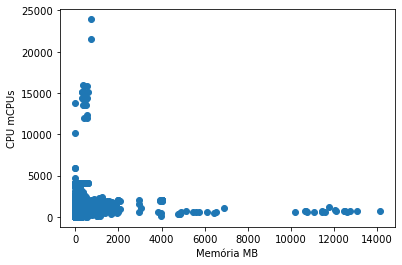

In [37]:
plt.scatter(df_group_by_cpu_memoria['mediana_cpu'], df_group_by_cpu_memoria['pico_memoria']) #posicionamento dos eixos x e y
plt.xlabel('Memória MB')
plt.ylabel('CPU mCPUs')

# Explorar os dados com KMeans
- https://realpython.com/k-means-clustering-python/
- https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203


## Abordagem 1

### Hierarchical Clustering

Hierarchical clustering determines cluster assignments by building a hierarchy. This is implemented by either a bottom-up or a top-down approach:
- Divisive clustering is the top-down approach. It starts with all points as one cluster and splits the least similar clusters at each step until only single data points remain. 

Hierarchical clustering is a deterministic process, meaning cluster assignments won’t change when you run an algorithm twice on the same input data.

The strengths of hierarchical clustering methods include the following:

    They often reveal the finer details about the relationships between data objects.
    They provide an interpretable dendrogram.

The weaknesses of hierarchical clustering methods include the following:

    They’re computationally expensive with respect to algorithm complexity.
    They’re sensitive to noise and outliers.

## Abordagem 2

### Density-Based Clustering

Density-based clustering determines cluster assignments based on the density of data points in a region. Clusters are assigned where there are high densities of data points separated by low-density regions.

Unlike the other clustering categories, this approach doesn’t require the user to specify the number of clusters. Instead, there is a distance-based parameter that acts as a tunable threshold. This threshold determines how close points must be to be considered a cluster member.

Examples of density-based clustering algorithms include Density-Based Spatial Clustering of Applications with Noise, or DBSCAN, and Ordering Points To Identify the Clustering Structure, or OPTICS.

The strengths of density-based clustering methods include the following:

    They excel at identifying clusters of nonspherical shapes.
    They’re resistant to outliers.

The weaknesses of density-based clustering methods include the following:

    They aren’t well suited for clustering in high-dimensional spaces.
    They have trouble identifying clusters of varying densities.


In [38]:
df_group_by_cpu_memoria.shape

(10505, 5)

In [39]:
# Pré-processamento
from sklearn import preprocessing
import numpy as np

In [40]:
# Processo de Normalização
df_group_by_cpu_memoria_normalized = df_group_by_cpu_memoria.to_numpy()
df_group_by_cpu_memoria_normalized

array([['0000c672f5e96d5c7078db295c99dd1f', 6.028352128448001,
        8.7384106649279, 463.75390625, 465.0859375],
       ['00115d136a63167e961d60147809aff7', 184.9855552577645,
        315.642121633187, 204.26953125, 204.296875],
       ['001b37c1ee0862b0326ee3571c4f05de', 0.07942229354840938,
        0.08450200130125764, 54.5703125, 55.79296875],
       ...,
       ['ffe759fe7996f523feb279a03a48233a', 0.00706085451283642,
        0.00923288639810474, 4.65625, 4.6640625],
       ['ffee4328dfcdb0cc27e380c4339553e6', 66.96807071349605,
        528.1486542952007, 1995.833984375, 2002.9296875],
       ['fffccdea8e33694fe0152305f4b359ef', 27.4795267797065,
        27.4795267797065, 236.22265625, 236.22265625]], dtype=object)

In [41]:
# Consideração de Valores Médios (Mediana)
df_group_by_cpu_memoria_normalized = np.delete(df_group_by_cpu_memoria_normalized, 0, axis=1) # Deleta hash
df_group_by_cpu_memoria_normalized = np.delete(df_group_by_cpu_memoria_normalized, 1, axis=1) # Deleta pico cpu
df_group_by_cpu_memoria_normalized = np.delete(df_group_by_cpu_memoria_normalized, 1, axis=1) # Deleta mediana da memoria
# Features consideradas (mediana da CPU e Pico de Memória)
df_group_by_cpu_memoria_normalized

array([[6.028352128448001, 465.0859375],
       [184.9855552577645, 204.296875],
       [0.07942229354840938, 55.79296875],
       ...,
       [0.00706085451283642, 4.6640625],
       [66.96807071349605, 2002.9296875],
       [27.4795267797065, 236.22265625]], dtype=object)

In [42]:
df_group_by_cpu_memoria_normalized = np.delete(df_group_by_cpu_memoria_normalized, 2, axis=1) # Deleta classe

IndexError: index 2 is out of bounds for axis 1 with size 2

In [43]:
df_group_by_cpu_memoria_normalized

array([[6.028352128448001, 465.0859375],
       [184.9855552577645, 204.296875],
       [0.07942229354840938, 55.79296875],
       ...,
       [0.00706085451283642, 4.6640625],
       [66.96807071349605, 2002.9296875],
       [27.4795267797065, 236.22265625]], dtype=object)

In [44]:
# Normalizacao
scaler = preprocessing.StandardScaler().fit(df_group_by_cpu_memoria_normalized)
scaler

StandardScaler()

In [45]:
scaler.mean_

array([ 66.81506781, 524.60168967])

In [46]:
scaler.scale_

array([556.69555371, 938.9736832 ])

In [47]:
scaled_features = scaler.transform(df_group_by_cpu_memoria_normalized)
scaled_features

array([[-1.09192027e-01, -6.33838341e-02],
       [ 2.12271297e-01, -3.41122249e-01],
       [-1.19878172e-01, -4.99277807e-01],
       ...,
       [-1.20008156e-01, -5.53729712e-01],
       [ 2.74841260e-04,  1.57440834e+00],
       [-7.06589819e-02, -3.07121529e-01]])

In [48]:
# Scaled data has zero mean and unit variance:
scaled_features.mean(axis=0)

array([-2.36734848e-17,  8.11662335e-18])

In [49]:
scaled_features.std(axis=0)

array([1., 1.])

In [50]:
# Valor minimo de cada coluna
scaled_features.min(axis=0)

array([-0.12002076, -0.5574031 ])

In [51]:
# Valor máximo de cada coluna
scaled_features.max(axis=0)

array([25.23741148, 24.92402108])

#### Aplicação do K-Means

In [52]:
from sklearn.cluster import KMeans

## Determinação do Número de Cluster pela técnica ebow

In [143]:
# kmeans = KMeans(
#  init="random",
#  n_clusters=5, # K classes
#  n_init=10,
#  max_iter=400,
#  random_state=42)

In [55]:
distortions = []
n_clusters = range(2, 10)
for n in n_clusters:    
    print('Cluster ', n)
    distortions.append(KMeans(n_clusters=n, n_init=100, max_iter=10_000, random_state=61658).fit(scaled_features).inertia_)
distortions

Cluster  2
Cluster  3
Cluster  4
Cluster  5
Cluster  6
Cluster  7
Cluster  8
Cluster  9


[13088.170004063486,
 6838.466068104484,
 4088.3388976704355,
 2437.1585982763017,
 1769.9821026702427,
 1389.8611607444143,
 1035.3002556407018,
 846.2510657132518]

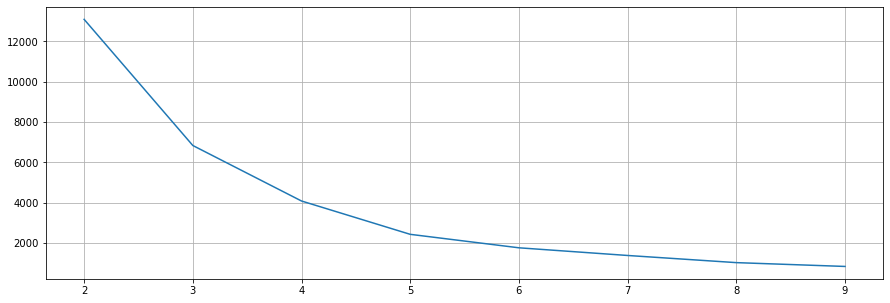

In [56]:
plt.figure(figsize=(15,5))
plt.plot(n_clusters, distortions)
plt.grid()

In [57]:
# Treinamento com 5 classes (Cluster = 5)
kmeans = KMeans(n_clusters=5, n_init=100, max_iter=10_000, random_state=61658).fit(scaled_features)


In [58]:
# Statistics from the initialization run with the lowest SSE 
# are available as attributes of kmeans after calling .fit():
# The lowest SSE value
kmeans.inertia_

2437.1585982763017

In [59]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.09146612, -0.24977836],
       [21.14722245,  0.18661559],
       [ 0.62835724, 15.17931792],
       [ 7.94036967,  0.71300576],
       [ 0.11754481,  1.15236016]])

In [60]:
# The number of iterations required to converge
kmeans.n_iter_

12

In [61]:
# The cluster assignments are stored as a one-dimensional NumPy array in kmeans.labels_.
kmeans.labels_[:5]

array([0, 0, 0, 0, 4], dtype=int32)

In [ ]:
# Função de Normalização de Max-Min
# Mean normalization
# (df-df.mean())/df.std()
# def normalize(df):
#     result = df.copy()
#     for feature_name in df.columns:
#         if feature_name != 'hash':
#             max_value = df[feature_name].max()
#             min_value = df[feature_name].min()
#             result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
#     return result

In [62]:
len(kmeans.labels_)

10505

In [63]:
series_label = pd.Series(kmeans.labels_)
series_label

0        0
1        0
2        0
3        0
4        4
        ..
10500    4
10501    0
10502    0
10503    4
10504    0
Length: 10505, dtype: int32

In [64]:
# Adiciona a série ao dataframe
df_group_by_cpu_memoria['classe'] = kmeans.labels_
df_group_by_cpu_memoria

,hash,mediana_cpu,pico_cpu,mediana_memoria,pico_memoria,classe
0,0000c672f5e96d5c7078db295c99dd1f,6.028352,8.738411,463.753906,465.085938,0
1,00115d136a63167e961d60147809aff7,184.985555,315.642122,204.269531,204.296875,0
2,001b37c1ee0862b0326ee3571c4f05de,0.079422,0.084502,54.570312,55.792969,0
3,0028c4dfdf4f19f3914cc5ca96f7b3d4,0.948848,1.106187,636.351562,636.355469,0
4,002b850fcc1b96f2b1b0621d6b5ee97b,1.719575,1.719575,1031.480469,1031.480469,4
...,...,...,...,...,...,...
10500,ffdd3f9ace04c87c5360e682942cbe80,3.362830,15.462593,1678.222656,1694.851562,4
10501,ffdf76b5e9458fb21062d50557d7f8fa,0.126827,0.126827,47.679688,47.679688,0
10502,ffe759fe7996f523feb279a03a48233a,0.007061,0.009233,4.656250,4.664062,0
10503,ffee4328dfcdb0cc27e380c4339553e6,66.968071,528.148654,1995.833984,2002.929688,4


In [65]:
scaled_features[:,0]

array([-0.10919203,  0.2122713 , -0.11987817, ..., -0.12000816,
        0.00027484, -0.07065898])

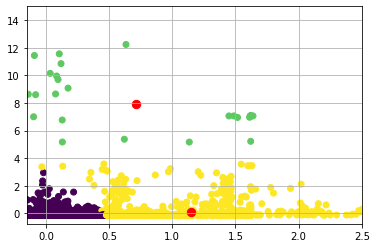

In [66]:

plt.scatter(scaled_features[:,1], scaled_features[:,0], c = kmeans.labels_) #posicionamento dos eixos x e y
plt.xlim(-0.15,2.5) #range do eixo x
plt.ylim(-0.75, 15) #range do eixo y

# plt.scatter(df_group_by_cpu_memoria['mediana_cpu'], df_group_by_cpu_memoria['mediana_memoria'], c = df_group_by_cpu_memoria['classe']) #posicionamento dos eixos x e y
# plt.xlabel('Memória MB')
# plt.ylabel('CPU mCPUs')
# plt.xlim(0, 8000) #range do eixo x
# plt.ylim(0, 10000) #range do eixo y
plt.grid() #função que desenha a grade no nosso gráfico
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], s = 70, c = 'red') #posição de cada centroide no gráfico
plt.show()

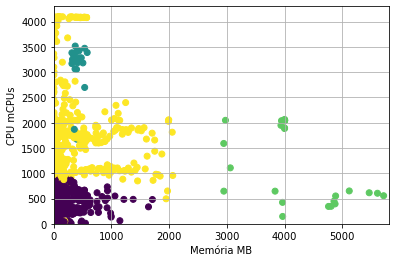

In [86]:
# plt.scatter(scaled_features[:,1], scaled_features[:,0], c = kmeans.labels_) #posicionamento dos eixos x e y
# plt.xlim(-0.15, 25) #range do eixo x
# plt.ylim(-0.75, 35) #range do eixo y

plt.scatter(df_group_by_cpu_memoria['mediana_cpu'], df_group_by_cpu_memoria['mediana_memoria'], c = df_group_by_cpu_memoria['classe']) #posicionamento dos eixos x e y
plt.xlabel('Memória MB')
plt.ylabel('CPU mCPUs')
plt.xlim(0, 5800) #range do eixo x
plt.ylim(0, 4300) #range do eixo y
plt.grid() #função que desenha a grade no nosso gráfico
plt.show()

## Restrição dos dados removendo as amostras com valores mais discrepantes

In [94]:
df_group_by_cpu_memoria

,hash,mediana_cpu,pico_cpu,mediana_memoria,pico_memoria
0,0000c672f5e96d5c7078db295c99dd1f,6.028352,8.738411,463.753906,465.085938
1,00115d136a63167e961d60147809aff7,184.985555,315.642122,204.269531,204.296875
2,001b37c1ee0862b0326ee3571c4f05de,0.079422,0.084502,54.570312,55.792969
3,0028c4dfdf4f19f3914cc5ca96f7b3d4,0.948848,1.106187,636.351562,636.355469
4,002b850fcc1b96f2b1b0621d6b5ee97b,1.719575,1.719575,1031.480469,1031.480469
...,...,...,...,...,...
10500,ffdd3f9ace04c87c5360e682942cbe80,3.362830,15.462593,1678.222656,1694.851562
10501,ffdf76b5e9458fb21062d50557d7f8fa,0.126827,0.126827,47.679688,47.679688
10502,ffe759fe7996f523feb279a03a48233a,0.007061,0.009233,4.656250,4.664062
10503,ffee4328dfcdb0cc27e380c4339553e6,66.968071,528.148654,1995.833984,2002.929688


In [95]:
df_group_by_cpu_memoria['pico_memoria'].describe()

count    10505.000000
mean       524.601690
std        939.018378
min          1.214844
25%         81.632812
50%        326.093750
75%        649.593750
max      23927.601562
Name: pico_memoria, dtype: float64

In [96]:
df_group_by_cpu_memoria['mediana_cpu'].describe()

count    10505.000000
mean        66.815068
std        556.722052
min          0.000043
25%          0.772589
50%          1.668919
75%          7.070047
max      14116.369827
Name: mediana_cpu, dtype: float64

In [97]:
# Considerando os 75% mais frequentes do valor médio (mediana) de CPU e valor máximo de memória (pico)
df_group_by_cpu_memoria = df_group_by_cpu_memoria[df_group_by_cpu_memoria['mediana_cpu'] < 7.08]
df_group_by_cpu_memoria = df_group_by_cpu_memoria[df_group_by_cpu_memoria['pico_memoria'] < 650]
df_group_by_cpu_memoria

,hash,mediana_cpu,pico_cpu,mediana_memoria,pico_memoria
0,0000c672f5e96d5c7078db295c99dd1f,6.028352,8.738411,463.753906,465.085938
2,001b37c1ee0862b0326ee3571c4f05de,0.079422,0.084502,54.570312,55.792969
3,0028c4dfdf4f19f3914cc5ca96f7b3d4,0.948848,1.106187,636.351562,636.355469
5,002c616e25cfb0f2cac2e6796a914a5b,0.979157,115.668620,279.445312,280.847656
6,003a266a21249ee7746b74f29c93ed07,0.565047,0.642564,51.771484,52.007812
...,...,...,...,...,...
10493,ffb39d3a90154fa331efdff422489197,2.147811,3.943654,511.630859,516.652344
10495,ffb71df790da9685eb0b280f40583e3b,5.844121,6.939110,585.976562,585.976562
10496,ffc59295b896b7b22280d0bf1be0699d,0.075469,0.112743,30.140625,30.441406
10501,ffdf76b5e9458fb21062d50557d7f8fa,0.126827,0.126827,47.679688,47.679688


In [98]:
# Redução da amostra para 62%
# Processo de Normalização
df_group_by_cpu_memoria_normalized = df_group_by_cpu_memoria.to_numpy()
df_group_by_cpu_memoria_normalized

# Consideração de Valores Médios (Mediana)
df_group_by_cpu_memoria_normalized = np.delete(df_group_by_cpu_memoria_normalized, 0, axis=1) # Deleta hash
df_group_by_cpu_memoria_normalized = np.delete(df_group_by_cpu_memoria_normalized, 1, axis=1) # Deleta pico cpu
df_group_by_cpu_memoria_normalized = np.delete(df_group_by_cpu_memoria_normalized, 1, axis=1) # Deleta mediana da memoria
# Features consideradas (mediana da CPU e Pico de Memória)
df_group_by_cpu_memoria_normalized

# Deleta a classe para uma nova classificação
df_group_by_cpu_memoria_normalized = np.delete(
df_group_by_cpu_memoria_normalized, 2, axis=1) # Deleta classe

IndexError: index 2 is out of bounds for axis 1 with size 2

In [99]:
# Normalizacao
scaler = preprocessing.StandardScaler().fit(df_group_by_cpu_memoria_normalized)

# Obtencao das features normalizadas
scaled_features = scaler.transform(df_group_by_cpu_memoria_normalized)
scaled_features

array([[ 2.95434309,  1.3424618 ],
       [-0.90244013, -0.81936764],
       [-0.33877782,  2.24708402],
       ...,
       [-0.90500343, -0.95327113],
       [-0.87170662, -0.86222088],
       [-0.94935317, -1.08942353]])

Cluster  2
Cluster  3
Cluster  4
Cluster  5
Cluster  6
Cluster  7
Cluster  8
Cluster  9


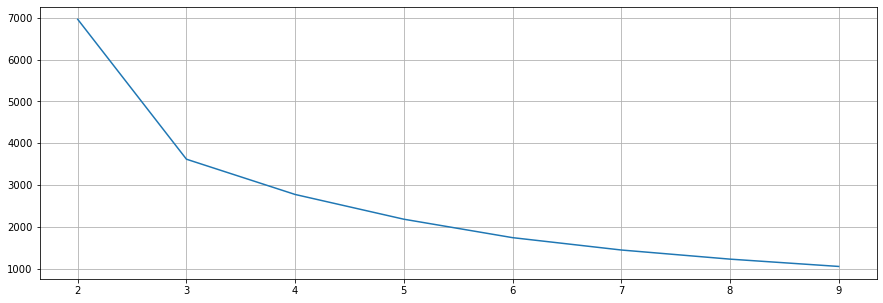

In [100]:
# Determinação do Número de Clusters
distortions = []
n_clusters = range(2, 10)
for n in n_clusters:    
    print('Cluster ', n)
    distortions.append(KMeans(n_clusters=n, n_init=100, max_iter=10_000, random_state=61658).fit(scaled_features).inertia_)
distortions

plt.figure(figsize=(15,5))
plt.plot(n_clusters, distortions)
plt.grid()

In [101]:
# Treinamento com 5 classes (Cluster = 3)
kmeans = KMeans(n_clusters=3, n_init=100, max_iter=10_000, random_state=61658).fit(scaled_features)

# Adiciona os labels ao dataframe
df_group_by_cpu_memoria['classe'] = kmeans.labels_
df_group_by_cpu_memoria

,hash,mediana_cpu,pico_cpu,mediana_memoria,pico_memoria,classe
0,0000c672f5e96d5c7078db295c99dd1f,6.028352,8.738411,463.753906,465.085938,2
2,001b37c1ee0862b0326ee3571c4f05de,0.079422,0.084502,54.570312,55.792969,0
3,0028c4dfdf4f19f3914cc5ca96f7b3d4,0.948848,1.106187,636.351562,636.355469,1
5,002c616e25cfb0f2cac2e6796a914a5b,0.979157,115.668620,279.445312,280.847656,1
6,003a266a21249ee7746b74f29c93ed07,0.565047,0.642564,51.771484,52.007812,0
...,...,...,...,...,...,...
10493,ffb39d3a90154fa331efdff422489197,2.147811,3.943654,511.630859,516.652344,1
10495,ffb71df790da9685eb0b280f40583e3b,5.844121,6.939110,585.976562,585.976562,2
10496,ffc59295b896b7b22280d0bf1be0699d,0.075469,0.112743,30.140625,30.441406,0
10501,ffdf76b5e9458fb21062d50557d7f8fa,0.126827,0.126827,47.679688,47.679688,0


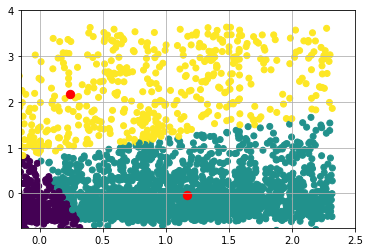

In [104]:
# Gráficos dos valores das features normalizadas
plt.scatter(scaled_features[:,1], scaled_features[:,0], c = kmeans.labels_) #posicionamento dos eixos x e y
plt.xlim(-0.15,2.5) #range do eixo x
plt.ylim(-0.75, 4) #range do eixo y

# plt.scatter(df_group_by_cpu_memoria['mediana_cpu'], df_group_by_cpu_memoria['mediana_memoria'], c = df_group_by_cpu_memoria['classe']) #posicionamento dos eixos x e y
# plt.xlabel('Memória MB')
# plt.ylabel('CPU mCPUs')
# plt.xlim(0, 8000) #range do eixo x
# plt.ylim(0, 10000) #range do eixo y
plt.grid() #função que desenha a grade no nosso gráfico
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], s = 70, c = 'red') #posição de cada centroide no gráfico
plt.show()

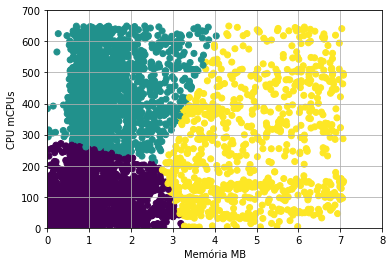

In [108]:
# Gráfico a partir dos valores originais
plt.scatter(df_group_by_cpu_memoria['mediana_cpu'], df_group_by_cpu_memoria['pico_memoria'], c = df_group_by_cpu_memoria['classe']) #posicionamento dos eixos x e y
plt.xlabel('Memória MB')
plt.ylabel('CPU mCPUs')
plt.xlim(0, 8) #range do eixo x
plt.ylim(0, 700) #range do eixo y
plt.grid() #função que desenha a grade no nosso gráfico
plt.show()

In [72]:
data_flavors = {'flavor': ['m0','m1','m2','m3','m4','m5','m6','m7','m8','m9', 'n2'],
          'cpu': [4, 8,16, 24, 32, 48, 64, 80, 96, 96, 256],
          'memoria': [64, 128, 256, 384, 512, 768, 1024, 1280, 1536, 2048, 4096]
        }

df_flavors = pd.DataFrame(data_flavors, columns = ['flavor','cpu', 'memoria'])
df_flavors

,flavor,cpu,memoria
0,m0,4,64
1,m1,8,128
2,m2,16,256
3,m3,24,384
4,m4,32,512
5,m5,48,768
6,m6,64,1024
7,m7,80,1280
8,m8,96,1536
9,m9,96,2048


In [74]:
# Rotular
# Flavors (cpu, memoria)
# m0;4;64;
# m1;8;128;
# m2;16;256;
# m3;24;384
# m4;32;512;
# m5;48;768;
# m6;64;1024;
# m7;80;1280
# m8;96;1536;
# m9;96;2048;
# n2;256;4096;
df_group_by_memoria_cpu['flavor'] = None

df_group_by_memoria_cpu

,hash,mCPU,memoria,flavor
0,0000c672f5e96d5c7078db295c99dd1f,6.028352,465.085938,None
1,00115d136a63167e961d60147809aff7,184.985555,204.296875,None
3,0028c4dfdf4f19f3914cc5ca96f7b3d4,0.948848,636.355469,None
5,002c616e25cfb0f2cac2e6796a914a5b,0.979157,280.847656,None
6,003a266a21249ee7746b74f29c93ed07,0.565047,52.007812,None
...,...,...,...,...
11662,ffc59295b896b7b22280d0bf1be0699d,0.075469,30.441406,None
11664,ffca80265d8a3059193ae0642815206b,559.051871,474.265625,None
11668,ffdf76b5e9458fb21062d50557d7f8fa,0.126827,47.679688,None
11669,ffe759fe7996f523feb279a03a48233a,0.007061,4.664062,None


In [100]:
for indice in range(len(df_group_by_memoria_cpu)):
    reg = df_group_by_memoria_cpu.iloc[indice]
    for i in range(len(df_flavors)):
        if reg['memoria'] <= df_flavors.at[i, 'memoria']:
            if reg['mCPU'] <= df_flavors.at[i, 'cpu']:
                reg['flavor'] = df_flavors.at[i, 'flavor']
                break

/home/56740050368/Softwares/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()
